In [10]:
import pandas as pd
import plotly.express as px
import numpy as np 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import SnowballStemmer
from string import punctuation
from wordcloud import WordCloud

In [11]:
### This datset is filtered to top 10 countries
wine_p = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Checkpoint-January/main/ML-Output/wines_with_price.csv')

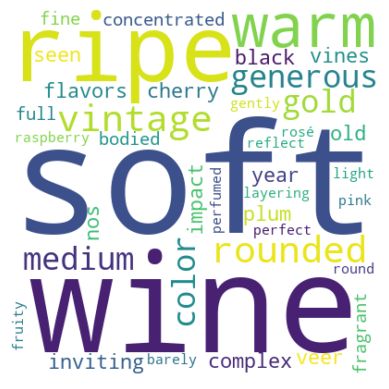

In [12]:
def generate_country(selectcountry):
    description_country = str(wine_p[wine_p['country'].str.contains(selectcountry, na=False)]['description'])
    description_country = re.sub(r"\d+","",description_country)
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    nopunc = tokenizer.tokenize(description_country)
    country_words=" ".join(nopunc)
    country_words= nltk.word_tokenize(country_words.lower())
    nums = re.findall("[0-9]+",description_country)
    stop_words = set(stopwords.words('english'))
    stop_words |= set(nums) #add the list with all the numbers in the string to the list of stopwords
    stop_words.update({'like','much', selectcountry.lower()})
    words = country_words
    sentence = [w for w in words if not w in stop_words]
    wordcloud = WordCloud(width=400, height=400, max_words= 40,background_color='white', max_font_size=200, min_font_size=10)
    freq = nltk.FreqDist(sentence)
    wordcloud.generate_from_frequencies(freq)
    plt.axis("off")
    plt.margins(x=0, y=0)
    fig = plt.imshow(wordcloud, interpolation="bilinear")
    return fig
generate_country('France')



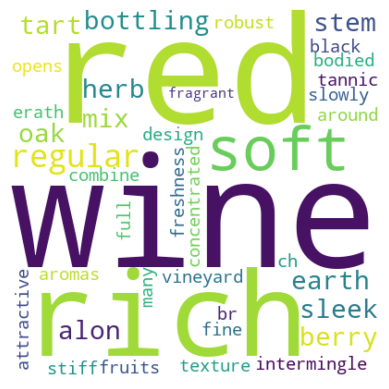

In [13]:
def generate_variety(selectcountry):
    description_country = str(wine_p[wine_p['variety'].str.contains(selectcountry, na=False)]['description'])
    description_country = re.sub(r"\d+","",description_country)
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    nopunc = tokenizer.tokenize(description_country)
    country_words=" ".join(nopunc)
    country_words= nltk.word_tokenize(country_words.lower())
    nums = re.findall("[0-9]+",description_country)
    stop_words = set(stopwords.words('english'))
    stop_words |= set(nums) #add the list with all the numbers in the string to the list of stopwords
    stop_words.update({'like','much', selectcountry.lower()})
    words = country_words
    sentence = [w for w in words if not w in stop_words]
    wordcloud = WordCloud(width=400, height=400, max_words= 40,background_color='white', max_font_size=200, min_font_size=10)
    freq = nltk.FreqDist(sentence)
    wordcloud.generate_from_frequencies(freq)
    plt.axis("off")
    plt.margins(x=0, y=0)
    fig = plt.imshow(wordcloud, interpolation="bilinear")
    return fig
generate_variety('Pinot Noir')